## Introduction and Problem Description

In this notebook, we do a initial data analysis to investigate if we can predict energy production from wind and solar power based on weather data. Therefore, we combine production data with weather data and try to make sense of it. Keep in mind that we do this in order to find if we would continue with developing a model to predict energy production based on the weather data.
The data we look at covers the whole year 2023.

### Load data and generate the basic set to show what we have

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data imports
production_spain_raw = pd.read_csv("ES-solar-wind-2023.csv")
production_portugal_raw = pd.read_csv("PT-solar-wind-2023.csv")
era5_data_from_csv = pd.read_csv("ERA5DataIberia_GeoMeanAndMedian.csv")

In [3]:
# get production data from spain and downsample it to match the ERA5 data
production_spain = production_spain_raw.copy()
production_spain["datetime"] = pd.DatetimeIndex(pd.to_datetime(production_spain["datetime"]))
production_spain.set_index("datetime", inplace=True)
production_spain.drop(["zone_key"], axis=1, inplace=True)
production_spain = production_spain.resample('H').mean()
# production_spain

In [4]:
# get production data from portugal and downsample it to match the ERA5 data
production_portugal = production_portugal_raw.copy()
production_portugal["datetime"] = pd.DatetimeIndex(pd.to_datetime(production_portugal["datetime"]))
production_portugal.set_index("datetime", inplace=True)
production_portugal.drop(["zone_key"], axis=1, inplace=True)
production_portugal = production_portugal.resample('H').mean()
# production_portugal

In [5]:
# combine production data
production_all = production_portugal + production_spain
production_all.fillna(0, inplace=True)
production_all.rename(columns={'solar': "production_from_solar", 'wind': "production_from_wind"}, inplace=True)
# production_all

In [6]:
# read ERA5 weather data from file and do some transformations
era5_data = era5_data_from_csv.copy()
era5_data["time"] = pd.DatetimeIndex(pd.to_datetime(era5_data["time"], utc=True))
era5_data.set_index("time", inplace=True)
era5_data[["d2m_mean", "t2m_mean", "d2m_median", "t2m_median"]] = era5_data[["d2m_mean", "t2m_mean", "d2m_median", "t2m_median"]] - 273.15  # scale degrees kelvin to degrees celsius
era5_data = era5_data.resample('H').mean()
# era5_data

In [7]:
# combine all data and introduce seasons
all_data = pd.concat([era5_data, production_all], axis=1)
seasons = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
all_data["season"] = all_data.index.month% 12 // 3 + 1
all_data.replace({"season": seasons}, inplace = True)
all_data

u100_median  v100_median  u10n_median  u10_median  \
2023-01-01 00:00:00+00:00    -0.466034     4.151276    -0.422867   -0.625671   
2023-01-01 01:00:00+00:00    -0.781036     3.948929    -0.558197   -0.774551   
2023-01-01 02:00:00+00:00    -0.988327     3.850067    -0.653076   -0.920715   
2023-01-01 03:00:00+00:00    -1.171646     3.751862    -0.684509   -1.011841   
2023-01-01 04:00:00+00:00    -1.211914     3.908905    -0.701797   -0.914230   
...                                ...          ...          ...         ...   
2023-12-31 19:00:00+00:00     4.561066     0.021027     1.835495    2.102661   
2023-12-31 20:00:00+00:00     4.397720    -0.057739     1.456497    2.019013   
2023-12-31 21:00:00+00:00     4.181686    -0.531769     1.418457    1.885666   
2023-12-31 22:00:00+00:00     3.877853    -0.388550     1.328156    1.651123   
2023-12-31 23:00:00+00:00     3.596466    -0.713928     1.155411    1.518509   

                           v10n_median  v10_median  d2m_median  t2m_median  \
2023-01-01 00:00:00+00:00     1.539581    1.986374     6.98600    11.33853   
2023-01-01 01:00:00+00:00     1.591400    1.957718     6.75118    11.25845   
2023-01-01 02:00:00+00:00     1.778839    1.966400     6.63632    11.08145   
2023-01-01 03:00:00+00:00     1.997284    2.191925     6.35696    11.06588   
2023-01-01 04:00:00+00:00     1.896072    2.040314     6.06582    11.20120   
...                                ...         ...         ...         ...   
2023-12-31 19:00:00+00:00     0.169098    0.299454     6.16024     9.61196   
2023-12-31 20:00:00+00:00     0.107071    0.223953     6.22158     8.96572   
2023-12-31 21:00:00+00:00     0.035187    0.062149     6.15470     8.59683   
2023-12-31 22:00:00+00:00     0.004028    0.006500     5.88810     8.39785   
2023-12-31 23:00:00+00:00    -0.115784   -0.158829     5.86978     8.28700   

                           tcc_median  u100_mean  ...  u10n_mean  u10_mean  \
2023-01-01 00:00:00+00:00    0.746323  -0.164854  ...  -0.241264 -0.322603   
2023-01-01 01:00:00+00:00    0.756332  -0.498661  ...  -0.425672 -0.517808   
2023-01-01 02:00:00+00:00    0.809311  -0.785724  ...  -0.595282 -0.677549   
2023-01-01 03:00:00+00:00    0.853119  -0.983744  ...  -0.698230 -0.787864   
2023-01-01 04:00:00+00:00    0.865540  -1.102583  ...  -0.750337 -0.850734   
...                               ...        ...  ...        ...       ...   
2023-12-31 19:00:00+00:00    0.995758   4.244251  ...   2.358644  2.629611   
2023-12-31 20:00:00+00:00    0.990891   3.974815  ...   2.181323  2.426156   
2023-12-31 21:00:00+00:00    0.989655   3.721321  ...   2.034617  2.248150   
2023-12-31 22:00:00+00:00    0.995148   3.685730  ...   2.002936  2.218670   
2023-12-31 23:00:00+00:00    0.998291   3.368931  ...   1.800817  1.976344   

                           v10n_mean  v10_mean  d2m_mean  t2m_mean  tcc_mean  \
2023-01-01 00:00:00+00:00   2.486546  2.618326   6.65502  11.57498  0.624960   
2023-01-01 01:00:00+00:00   2.488175  2.612866   6.55578  11.44690  0.658009   
2023-01-01 02:00:00+00:00   2.521235  2.633192   6.49328  11.31127  0.675454   
2023-01-01 03:00:00+00:00   2.564645  2.672456   6.45986  11.24145  0.683685   
2023-01-01 04:00:00+00:00   2.613443  2.720509   6.40853  11.22292  0.713198   
...                              ...       ...       ...       ...       ...   
2023-12-31 19:00:00+00:00   0.119593  0.093903   6.39266  10.23568  0.942479   
2023-12-31 20:00:00+00:00   0.050331  0.029090   6.29046   9.90267  0.954998   
2023-12-31 21:00:00+00:00   0.006948 -0.023693   6.15588   9.61642  0.958304   
2023-12-31 22:00:00+00:00   0.070117  0.059937   6.08676   9.35153  0.970066   
2023-12-31 23:00:00+00:00  -0.013847 -0.024951   6.02676   9.19160  0.968088   

                           production_from_solar  production_from_wind  season  
2023-01-01 00:00:00+00:00                   20.0                9031.0  winter  
2023-01-01 01:00:00+00:00                   20.0                8958.

The dataset we produced here is a combination of weather data and electricity production data from Portugal and Spain for solar and wind electricity. The weather dataset is called ERA5 and is provided by the European meteorological services.
From the weather data, we have wind speed measurements at 10m and 100m above ground as well as the temperature at 2m and the cloud cover for the time. The **wind is in m/s**, the **temperature in degree Celsius** (see transformation above) and the **cloud cover is a value between 0 and 1** where 1 is total coverage.

Further information is available from the dataset descriptions:
- Wind: https://nordata.physics.utoronto.ca/en/annexes-datasets-descriptions/74-wind/ecmwf-reanalysis-5th-generation-era5-atmospheric-reanalysis/
- Temperature: https://nordata.physics.utoronto.ca/en/annexes-datasets-descriptions/71-temperature/ecmwf-reanalysis-5th-generation-era5-atmospheric-reanalysis/

### Visualize Wind Data

The first columns of data deal with wind speed components. The horizontal wind speed is separated in a v and u component that represent the actual direction. The important point for now is that the components represent the North-South and East-West respectively. Let's have a look:


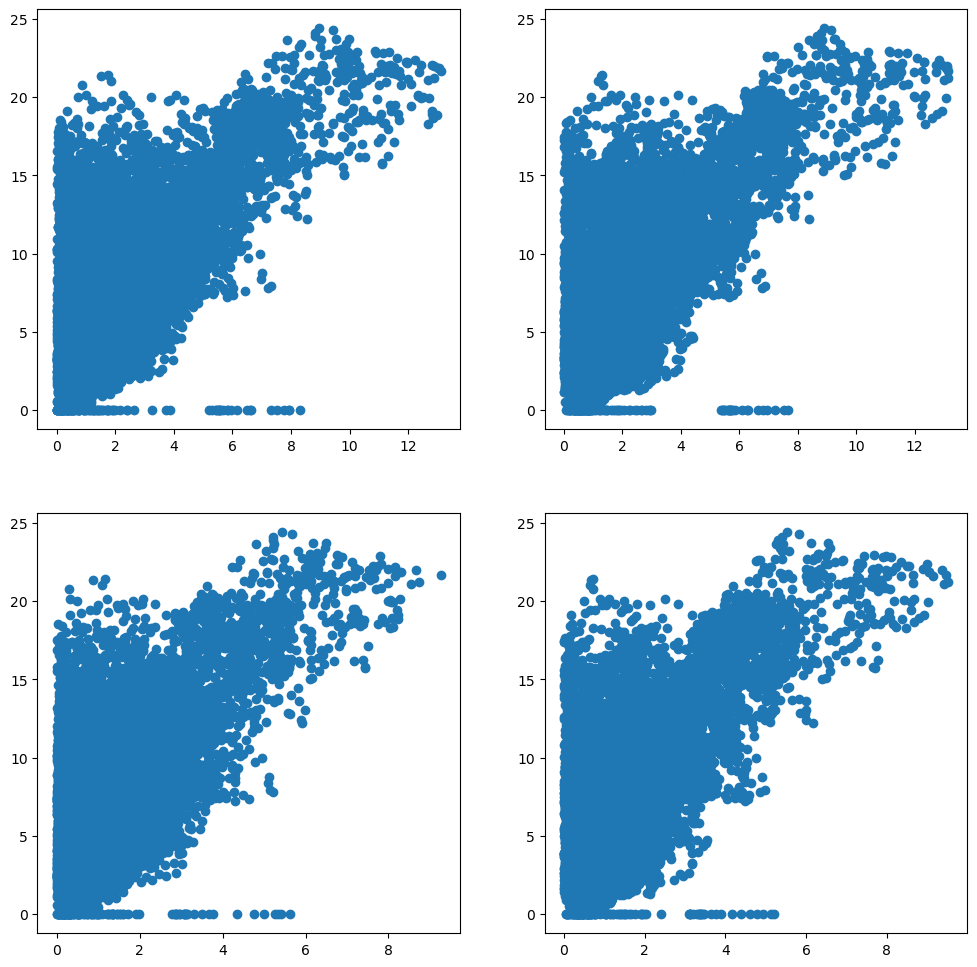

In [15]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax1.scatter(np.abs(all_data["u100_median"]), all_data['production_from_wind']/1e3)
ax2 = fig.add_subplot(222)
ax2.scatter(np.abs(all_data["u100_mean"]), all_data['production_from_wind']/1e3)
ax3 = fig.add_subplot(223)
ax3.scatter(np.abs(all_data["u10_median"]), all_data['production_from_wind']/1e3)
ax4 = fig.add_subplot(224)
ax4.scatter(np.abs(all_data["u10_mean"]), all_data['production_from_wind']/1e3)

Try to make sense of what you see! You can add labels to show your understanding, try different columns (switch the `u` to the `v` component for example) and think about the difference between mean and median.

After looking at the individual components, we see that the plots have a shape we can not easily interpret even though it makes sense. To resolve this, we calculate the actual wind speed based on the 2 components of the and show it against the wind production data:

In [16]:
wind_speeds_100_median, wind_speeds_100_mean, wind_speeds_10_median, wind_speeds_10_mean = [
    np.sqrt(
        all_data[v_comp]**2 + all_data[u_comp]**2
    ) for v_comp, u_comp in zip(
        ['v100_median', 'v100_mean', 'v10_median', 'v10_mean'],
        ['u100_median', 'u100_mean', 'u10_median', 'u10_mean']
)]

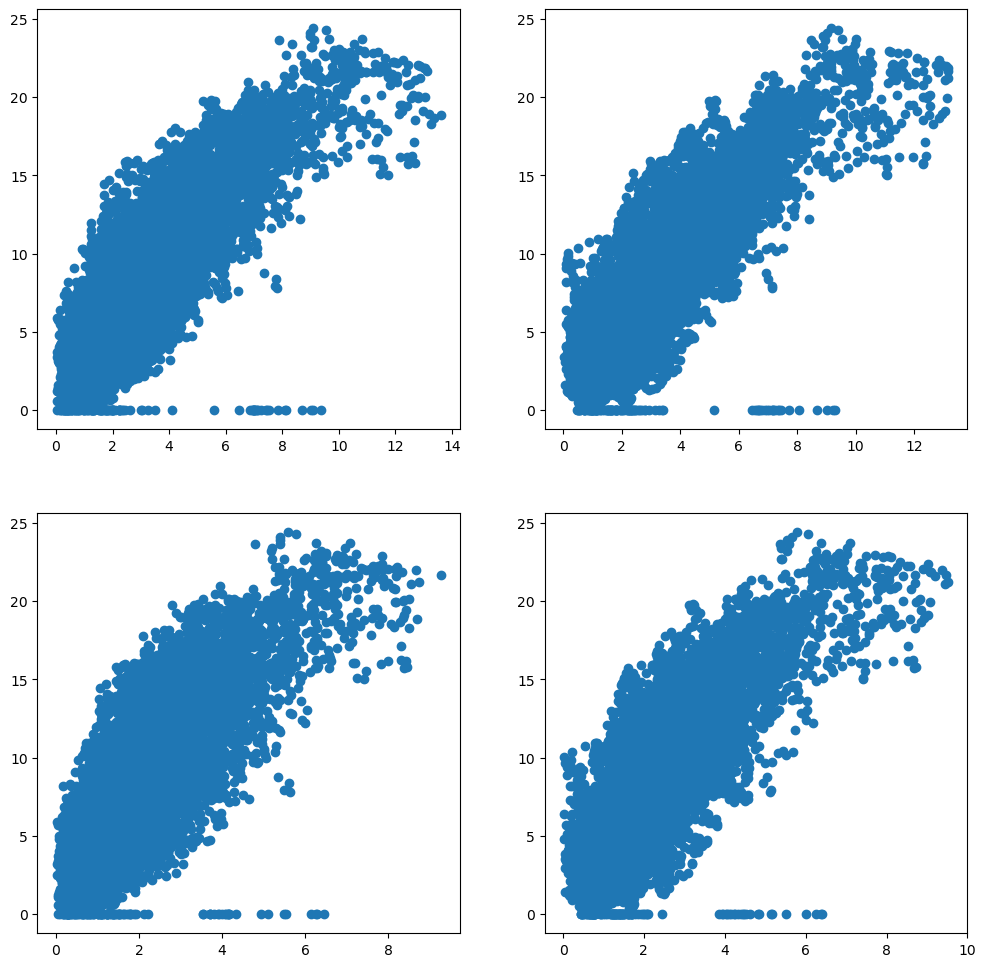

In [19]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax1.scatter(wind_speeds_100_median, all_data['production_from_wind']/1e3)
ax2 = fig.add_subplot(222)
ax2.scatter(wind_speeds_100_mean, all_data['production_from_wind']/1e3)
ax3 = fig.add_subplot(223)
ax3.scatter(wind_speeds_10_median, all_data['production_from_wind']/1e3)
ax4 = fig.add_subplot(224)
ax4.scatter(wind_speeds_10_mean, all_data['production_from_wind']/1e3)

# The commented plot below shows the mean and median data in the same plot. Feel free to look at it in comparison, but do not expect too much. Since we have so many data points, it's all on top of each other.
# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax1.scatter(wind_speeds_100_mean, all_data['production_from_wind']/1e3)
# ax1.scatter(wind_speeds_100_median, all_data['production_from_wind']/1e3)
# ax3 = fig.add_subplot(122)
# ax3.scatter(wind_speeds_10_median, all_data['production_from_wind']/1e3)
# ax3.scatter(wind_speeds_10_mean, all_data['production_from_wind']/1e3)

### Visualize Temperature Data

After the wind data, we now continue with the temperature data. We have 2 different temperatures: the temperature at 2m above ground and the dew point temperature. The dew point temperature is the temperature to which the air, at 2 m above the surface of the Earth, would have to be cooled for saturation to occur.

Since cloud cover is more important for electricity production from solar radiation than from wind, we include it here too. Again, use make sense of what you see. You can help yourself by labeling the plot axes.

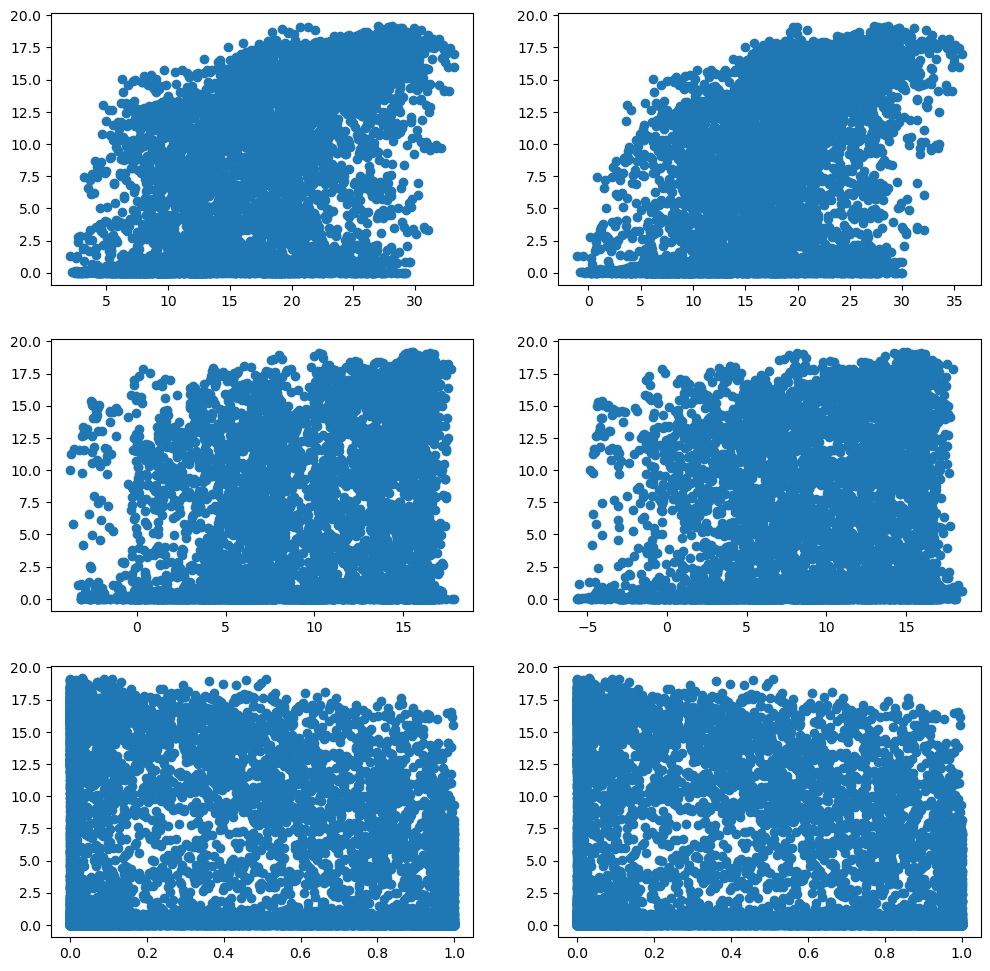

In [20]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(321)
ax1.scatter(all_data['t2m_mean'], all_data['production_from_solar']/1e3)
ax2 = fig.add_subplot(322)
ax2.scatter(all_data['t2m_median'], all_data['production_from_solar']/1e3)
ax3 = fig.add_subplot(323)
ax3.scatter(all_data['d2m_mean'], all_data['production_from_solar']/1e3)
ax4 = fig.add_subplot(324)
ax4.scatter(all_data['d2m_median'], all_data['production_from_solar']/1e3)
ax5 = fig.add_subplot(325)
ax5.scatter(all_data['tcc_median'], all_data['production_from_solar']/1e3)
ax6 = fig.add_subplot(326)
ax6.scatter(all_data['tcc_median'], all_data['production_from_solar']/1e3)



Solar energy production is way easier during the local day of a certain location. I hope you have seen by now that we have the data for a full year every 1h. Consequently, the data above includes quite a bit of night data, which is rather noise in our effort to show the data. To remove it, we filter the data to only include day hours. You can adjust the time during the day in the function below.

In [21]:
def prepare_daylight_plot_data(x_col, y_col="production_from_solar", start_time="09:00:00", end_time="17:00:00"):
    daylight_data_x = all_data[x_col].between_time(start_time, end_time)
    daylight_data_y = all_data[y_col][daylight_data_x.index]
    return daylight_data_x, daylight_data_y

In [22]:
plot_data = {x_col: prepare_daylight_plot_data(x_col) for x_col in ['d2m_median', 'd2m_mean', 't2m_median', 't2m_mean', 'tcc_median', 'tcc_mean']}

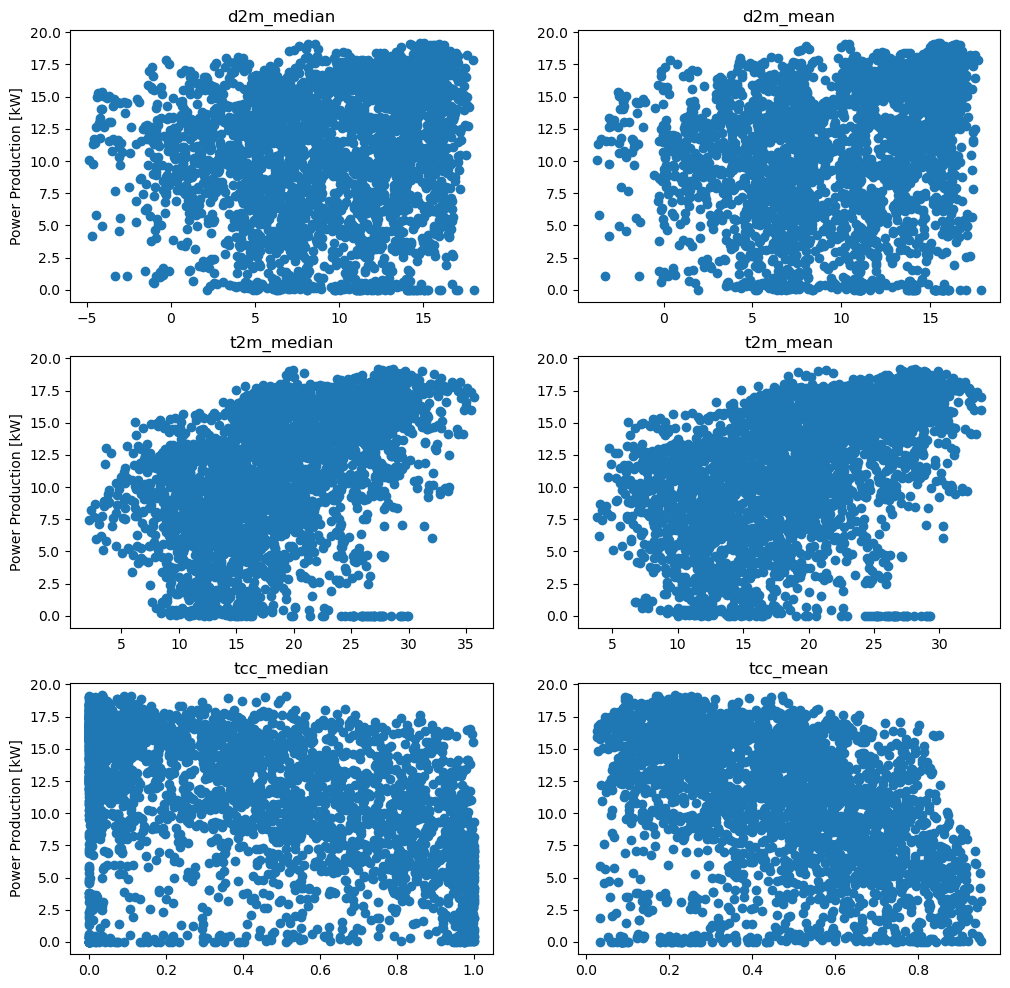

In [23]:
fig = plt.figure(figsize=(12, 12))
for i, data_dict in enumerate(plot_data.items()):
    key, data = data_dict
    x, y = data
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(key)
    ax.scatter(x, y/1e3)
    if i in [0, 2, 4]:
        ax.set_ylabel("Power Production [kW]")


In [27]:
# np.corrcoef(plot_data["t2m_mean"])
# np.corrcoef(wind_speeds_100_median, all_data['production_from_wind']/1e3)
np.corrcoef(plot_data["tcc_mean"])

array([[ 1.        , -0.43819654],
       [-0.43819654,  1.        ]])

### Summary

In this notebook, we saw how to load real world data, do basic transformations and preparations to show it in plots and then progress further. The examples should show you how important it is that one has at least some knowledge of the data on looks at to make sense of it.

The transformations we did for the wind data (speed instead of components) and the temperature data (select day light times) are part of what is called feature engineering. We transformed our initial features to something that makes more sense based on the problem we want to solve. If you think back to the tensorflow playground from the first exercise, you can see there that there were also feature transformations available such as x1^2 and x2^2. 

### Questions

- Q1: The data we see is by no means ready to be thrown into any model. What problems did you see during your investigations? Can you think of explanations why they occur? Do you have any idea how to mitigate them?
- Q2: Our starting point was to investigate if we can predict energy production from wind and solar power. Based on the data you see here, would you consider pursuing this task or not? Give an explanation why.
- Q3: What other data would make sense to include in this analysis? Can you think of something we do not have available here that would help us to make better predictions?
- Q4: The description says we deal with data for Portugal and Spain. Can you see this anywhere? Which conclusions can you draw based on your findings? What does it mean for the analysis?

# Q1
There's a lot of outlier data (the zeros on the first plots), a potential explanation could be equipment failure or breakdown of data collection mechanisms. Can drop these outliers from the data before feeding to a model. 

# Q2
Definitely wind speed and energy production as they have a high correlation coefficient of 0.8. We would need to look further into temperature as it had a much lower correlation coefficient of energy production of 0.49. With total cloud coverage we don't a strong (negative or positive) correlation between cloud coverage and energy production. This is only one way of measuring the correltion, and we could explore other factors. In conclusion, it's definitely worth pursuing predicting energy production based on wind speed. 

# Q3
If we were to continue this task, it could be worth looking at direction in order to maximize production. We could have more data on size, age, location, model, etc. of solar panels and wind turbines. Weather patterns in terms of storms for predicting higher production. Pollution as well as it affects solar. 

# Q4 
We can trust that the data was reported acurately from portual and spain but in terms of say north korea or russia, 
this may not be the same case. There are also many places that dont yet have the means to collect this data or the data does not yet exist. 


### Extra

- If you reach this point quickly, have a look at the `season` column in `all_data`. Can you make a plots based on the different seasons? To do so, select a column you want to show, start by selecting a single season and then progress to show all 4 in a single plot.

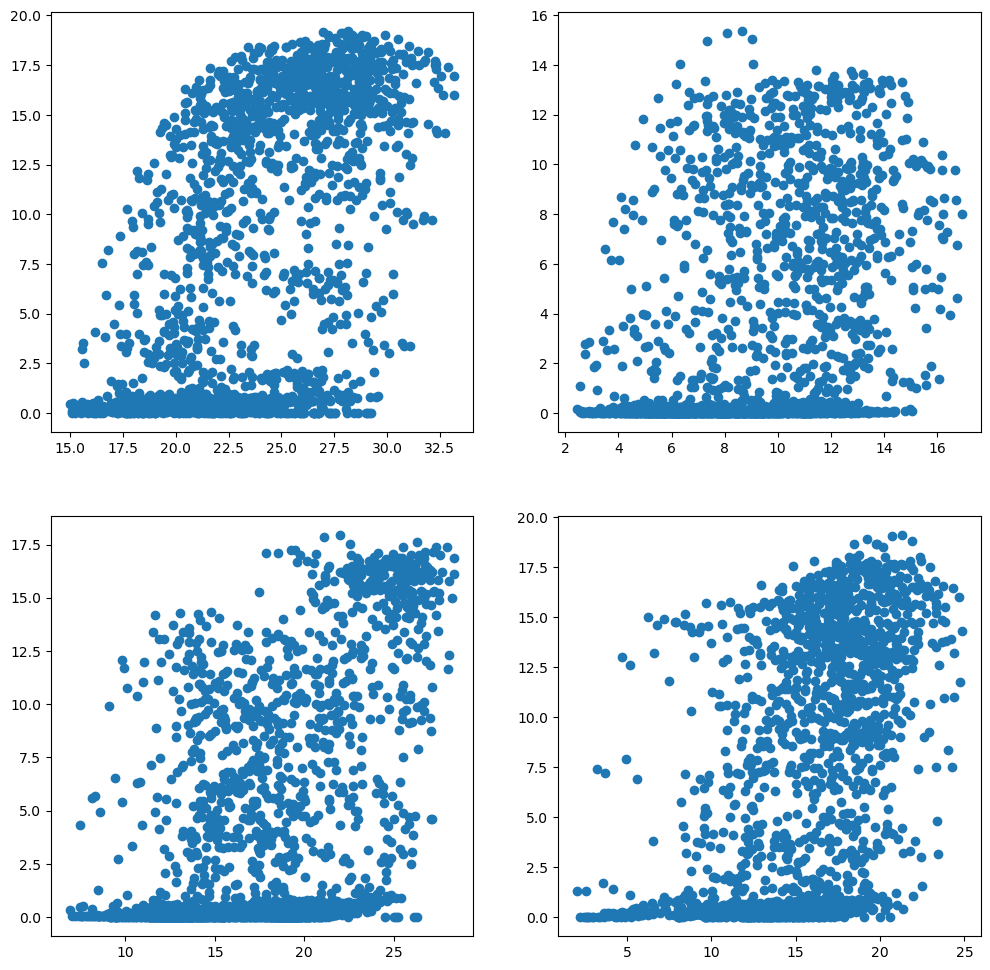

In [44]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(221)
ax1.scatter(all_data[all_data["season"] == "summer"]["t2m_mean"], all_data[all_data["season"] == "summer"]['production_from_solar']/1e3)
# ax1.title("summer")
ax2 = fig1.add_subplot(222)
ax2.scatter(all_data[all_data["season"] == "winter"]["t2m_mean"], all_data[all_data["season"] == "winter"]['production_from_solar']/1e3)
# ax2.title("winter")
ax3 = fig1.add_subplot(223)
ax3.scatter(all_data[all_data["season"] == "fall"]["t2m_mean"], all_data[all_data["season"] == "fall"]['production_from_solar']/1e3)
# ax3.title("fall")
ax4 = fig1.add_subplot(224)
ax4.scatter(all_data[all_data["season"] == "spring"]["t2m_mean"], all_data[all_data["season"] == "spring"]['production_from_solar']/1e3)
# ax4.title("spring")
plt.show()
